<h3 style="color:#2F4F4F;">DullRazor Algorithm</h3>

<p style="color:#696969;"><strong>Removing Hair from Sample Images</strong></p>

<p>The <strong>DullRazor</strong> algorithm is used to effectively remove hair from melanoma images, ensuring that skin lesions are more visible and easier to analyze.</p>



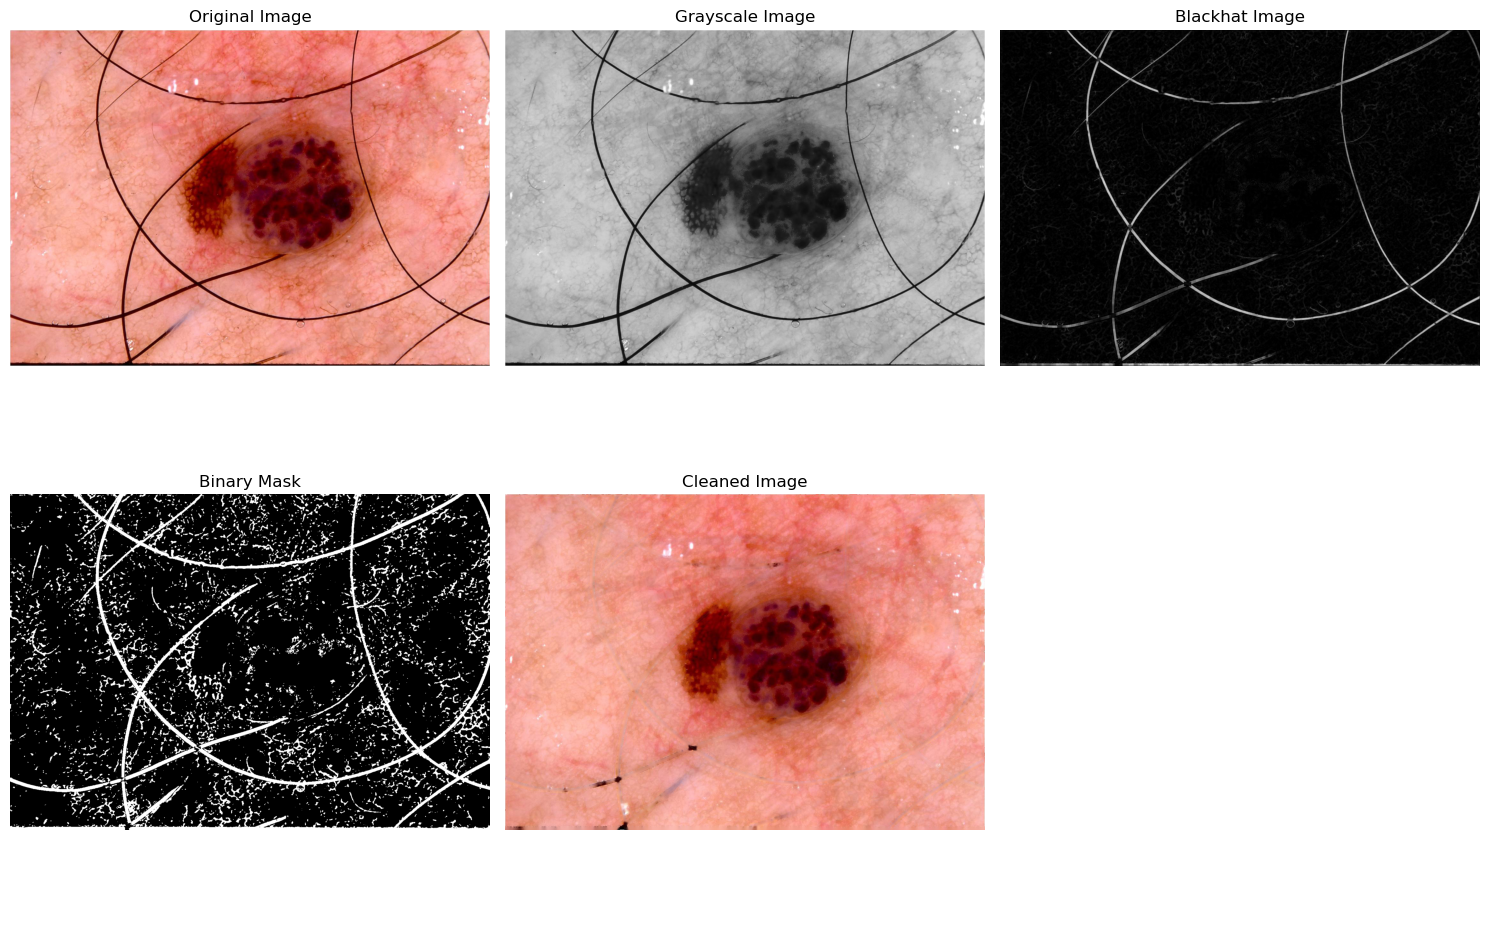

In [19]:
import cv2
import matplotlib.pyplot as plt

# ------------------------- IMAGE ACQUISITION -------------------------

# Input image path
path = 'images/practice_images/ISIC_0000191.jpg'

# Read the input image in color
image = cv2.imread(path, cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ----------------------- DULL RAZOR (REMOVE HAIR) -----------------------

# Convert the original image to grayscale
grayScale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Black Hat filter to extract hair features
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))  # 9x9 rectangular kernel
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)

# Apply a Gaussian filter to smooth the blackhat image
bhg = cv2.GaussianBlur(blackhat, (3,3), cv2.BORDER_DEFAULT)

# Perform binary thresholding to create a mask
ret, mask = cv2.threshold(bhg, 10, 255, cv2.THRESH_BINARY)

# In-paint the original image using the mask to remove hair
dst = cv2.inpaint(image, mask, 6, cv2.INPAINT_TELEA)

# ------------------------ DISPLAY IMAGES ------------------------

# Set up the subplots to display multiple images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Display the original image
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Display the grayscale image
axs[0, 1].imshow(grayScale, cmap='gray')
axs[0, 1].set_title('Grayscale Image')
axs[0, 1].axis('off')

# Display the blackhat filtered image
axs[0, 2].imshow(blackhat, cmap='gray')
axs[0, 2].set_title('Blackhat Image')
axs[0, 2].axis('off')

# Display the binary mask
axs[1, 0].imshow(mask, cmap='gray')
axs[1, 0].set_title('Binary Mask')
axs[1, 0].axis('off')

# Display the in-painted (cleaned) image
axs[1, 1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Cleaned Image')
axs[1, 1].axis('off')

# Hide the last subplot (axs[1, 2]) since we only have 5 images
axs[1, 2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
